In [35]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 
# seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



%matplotlib inline

df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')



In [29]:
for col in df_train.columns:
    msg = 'colums: {:<10} \t Percent of NaN value: {:2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)


colums: PassengerId 	 Percent of NaN value: 0.000000%
colums: Survived   	 Percent of NaN value: 0.000000%
colums: Pclass     	 Percent of NaN value: 0.000000%
colums: Name       	 Percent of NaN value: 0.000000%
colums: Sex        	 Percent of NaN value: 0.000000%
colums: Age        	 Percent of NaN value: 19.865320%
colums: SibSp      	 Percent of NaN value: 0.000000%
colums: Parch      	 Percent of NaN value: 0.000000%
colums: Ticket     	 Percent of NaN value: 0.000000%
colums: Fare       	 Percent of NaN value: 0.000000%
colums: Cabin      	 Percent of NaN value: 77.104377%
colums: Embarked   	 Percent of NaN value: 0.224467%


In [30]:
for col in df_test.columns:
    msg = 'colums: {:>10} \t Percent of NaN value: {:2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)


colums: PassengerId 	 Percent of NaN value: 0.000000%
colums:     Pclass 	 Percent of NaN value: 0.000000%
colums:       Name 	 Percent of NaN value: 0.000000%
colums:        Sex 	 Percent of NaN value: 0.000000%
colums:        Age 	 Percent of NaN value: 20.574163%
colums:      SibSp 	 Percent of NaN value: 0.000000%
colums:      Parch 	 Percent of NaN value: 0.000000%
colums:     Ticket 	 Percent of NaN value: 0.000000%
colums:       Fare 	 Percent of NaN value: 0.239234%
colums:      Cabin 	 Percent of NaN value: 78.229665%
colums:   Embarked 	 Percent of NaN value: 0.000000%


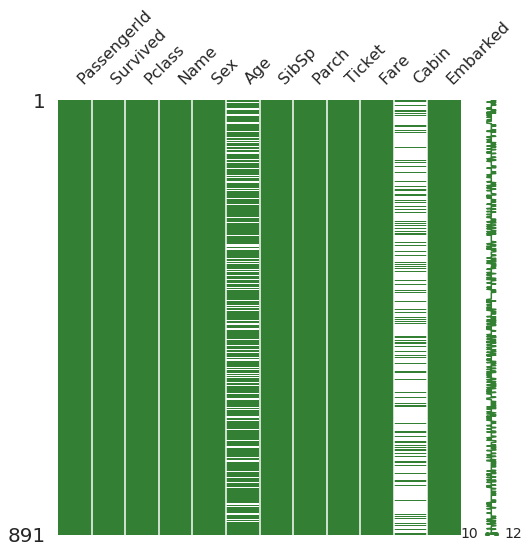

In [36]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.2))

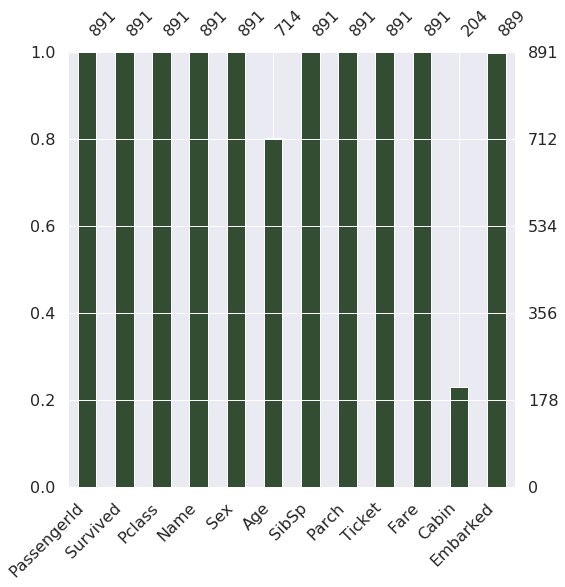

In [37]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.3, 0.2))

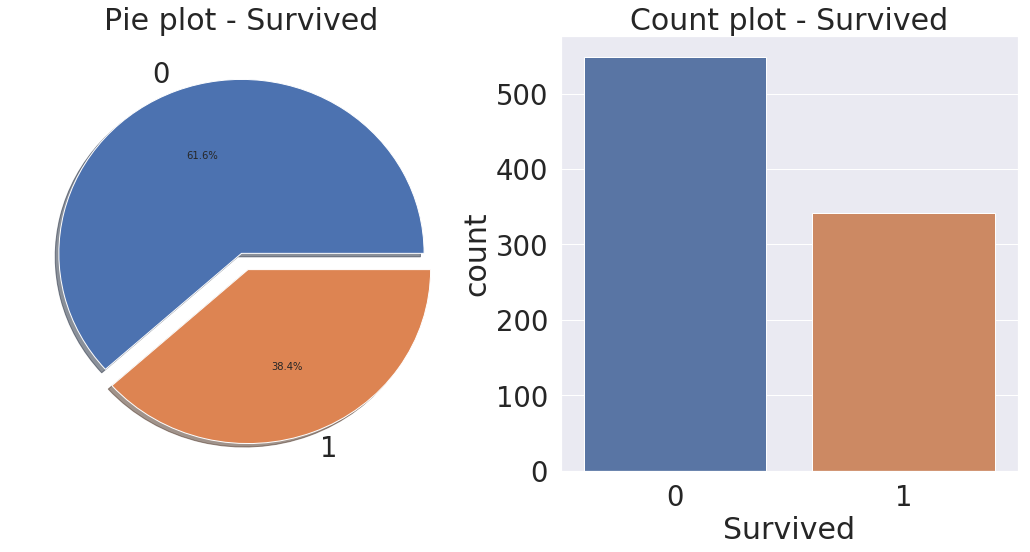

In [33]:
f, ax = plt.subplots(1,2,figsize=(18,8))#도화지

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

NameError: name 'explode' is not defined

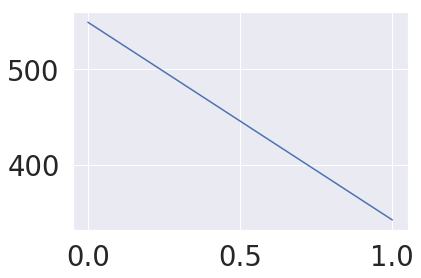

In [38]:
df_train['Survived'].value_counts().plot().pie(explode)

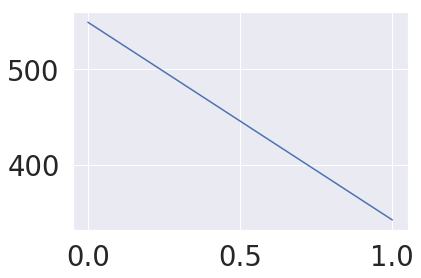

In [39]:
plt.plot(df_train['Survived'].value_counts())

2.1 Pclass

In [40]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [41]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [42]:
pd.crosstab(df_train['Pclass'], df_train["Survived"], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [45]:
# df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot().bar()

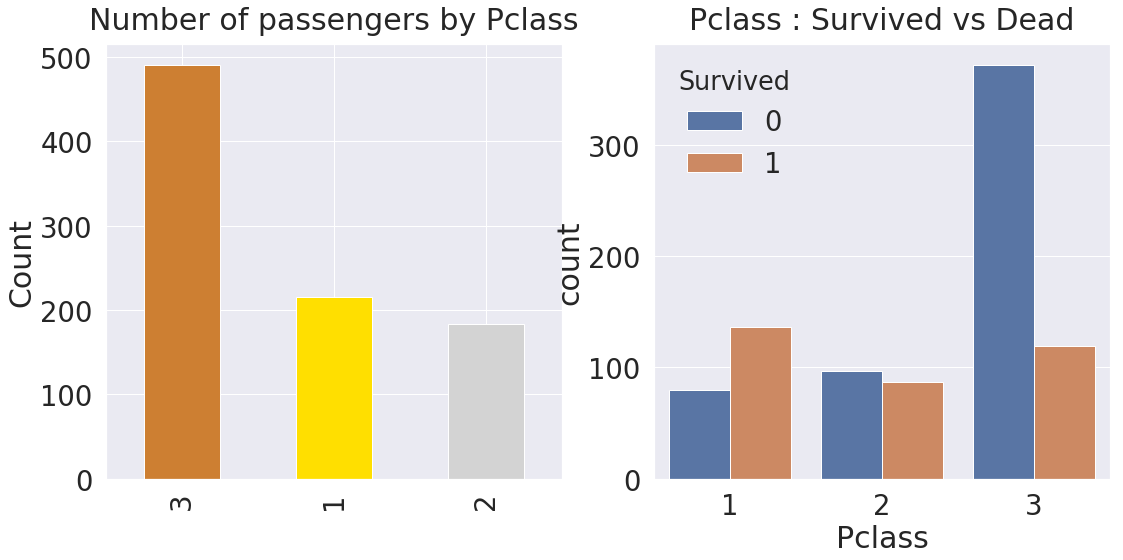

In [44]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers by Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()

2.2 Sex

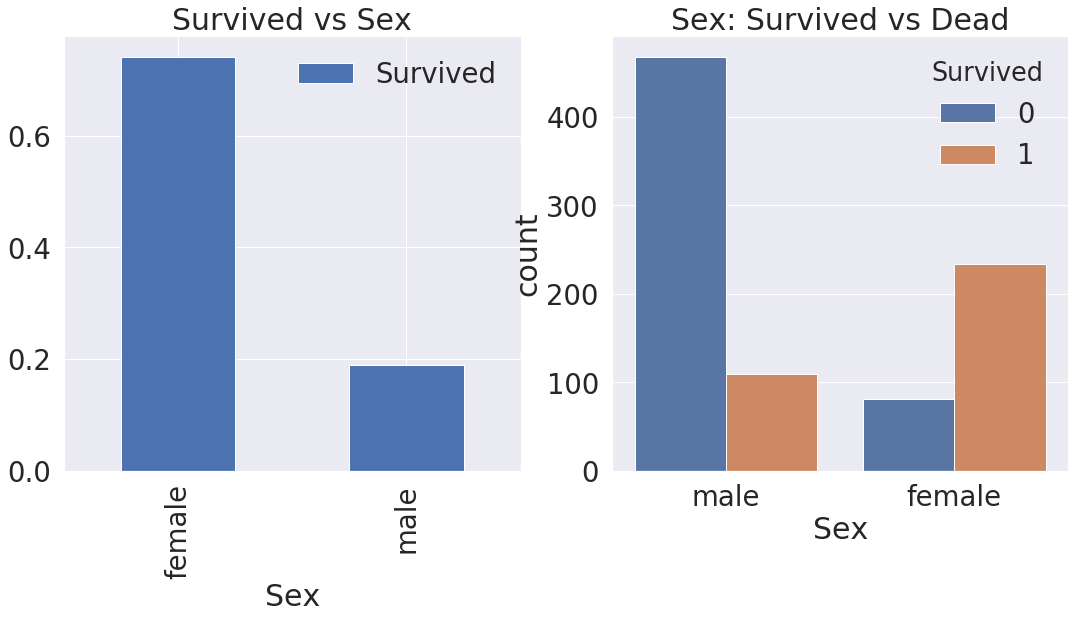

In [46]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [47]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


2.2 Both Pclass and Sex


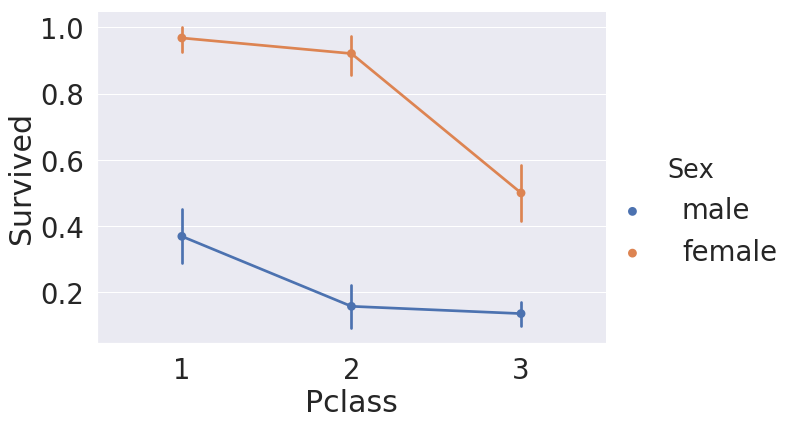

In [48]:
sns.factorplot('Pclass','Survived',hue='Sex',data = df_train, size=6, aspect=1.5)

1. Lady first
2. Money brings survival?

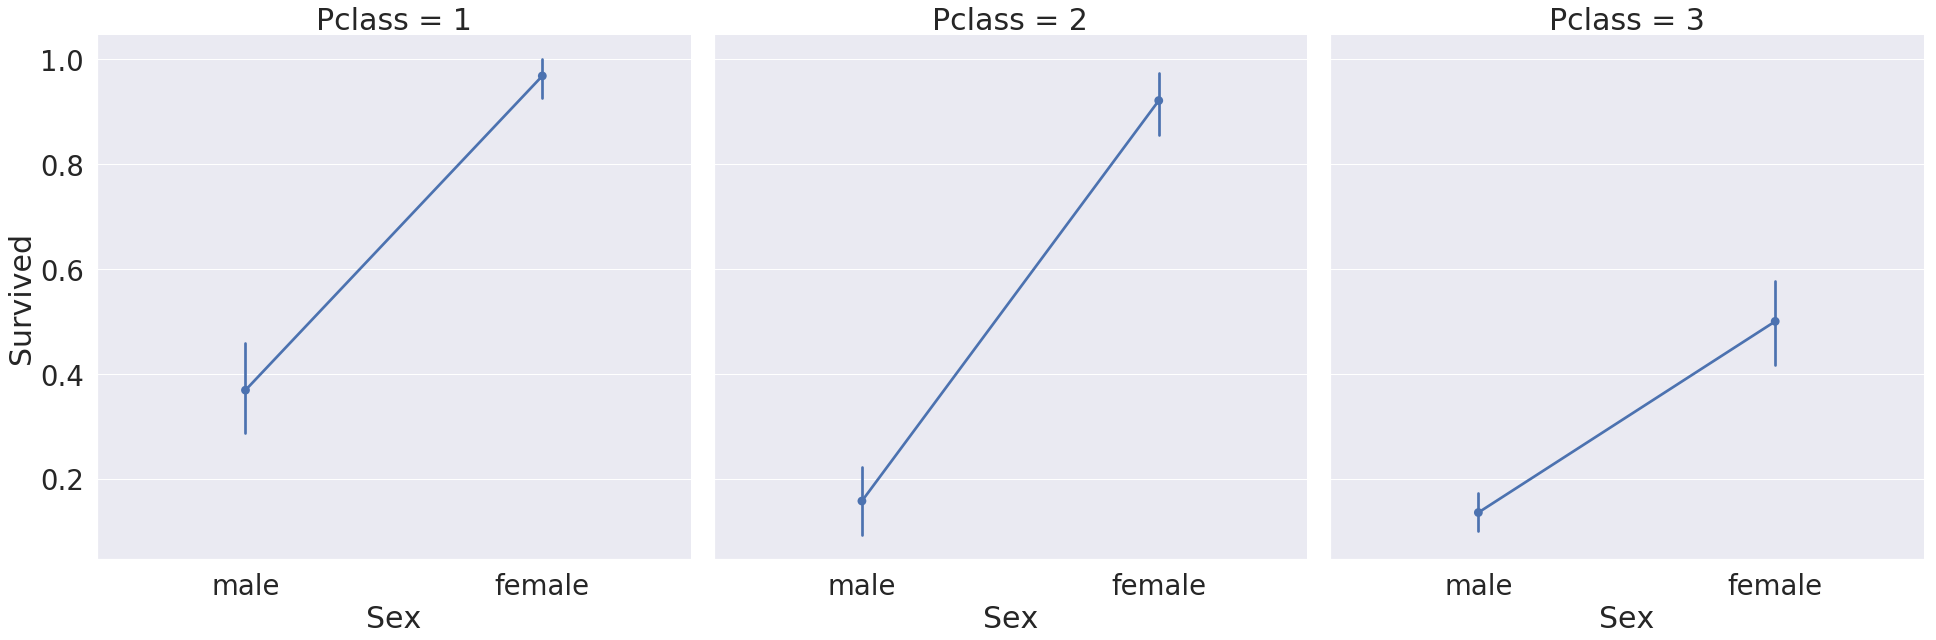

In [49]:
sns.factorplot(x='Sex', y='Survived', col = 'Pclass', data=df_train, saturation = 5,size=9, aspect = 1)

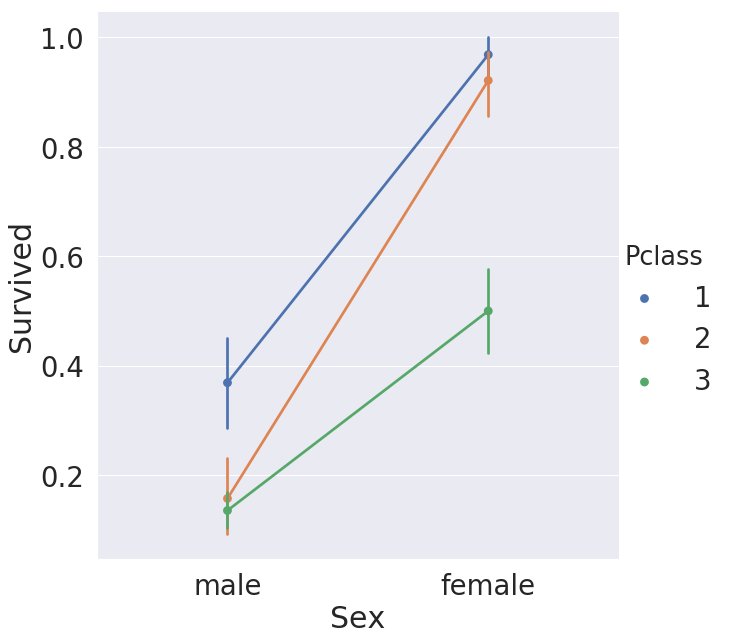

In [50]:
sns.factorplot(x='Sex', y='Survived', hue = 'Pclass', data=df_train, saturation = 5,size=9, aspect = 1)

2.3. Age

In [51]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이 : 29.7 Years


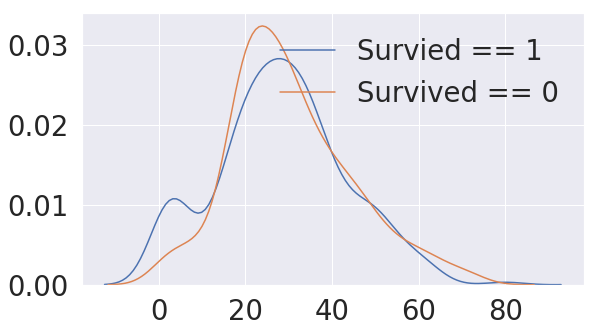

In [52]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survied == 1', 'Survived == 0'])
plt.show()

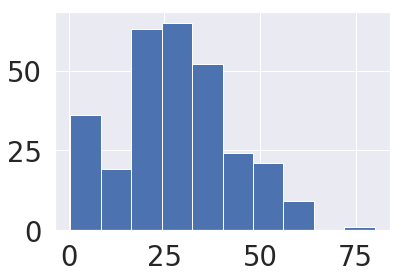

In [53]:
df_train[df_train['Survived'] == 1]['Age'].hist()

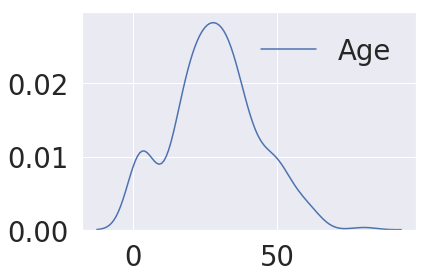

In [54]:
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'])
plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 360x360 with 0 Axes>

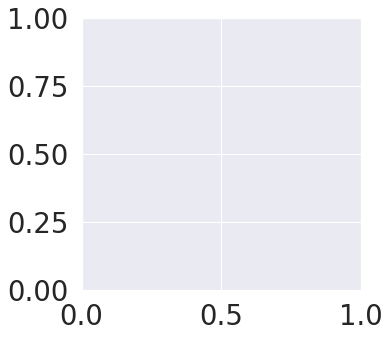

<Figure size 720x720 with 0 Axes>

In [55]:
f = plt.figure(figsize = (5,5))

f, ax = plt.subplots(1,1,figsize=(5,5))

plt.figure(figsize=(10,10))

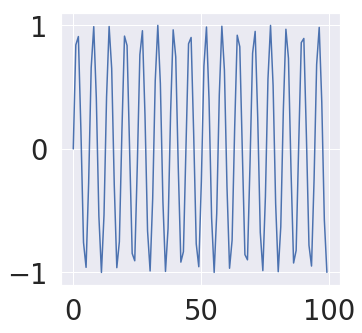

In [56]:
f = plt.figure(figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

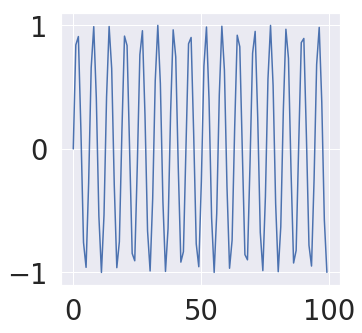

In [57]:
f, ax = plt.subplots(1,1,figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

ax.plot(b)

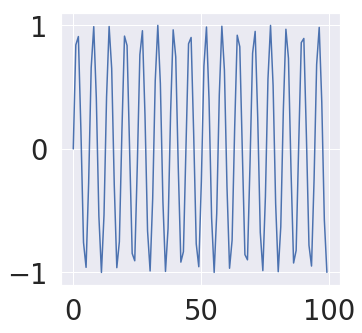

In [58]:
plt.figure(figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

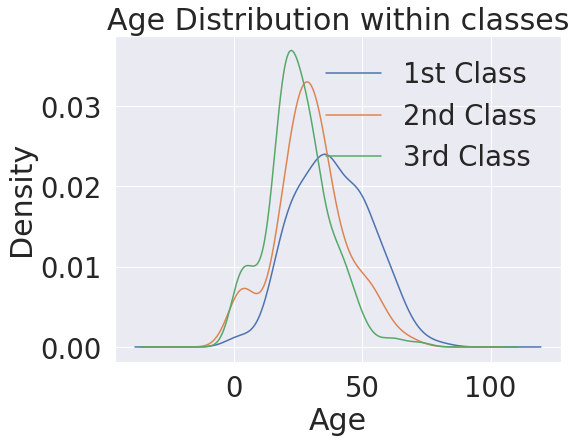

In [59]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

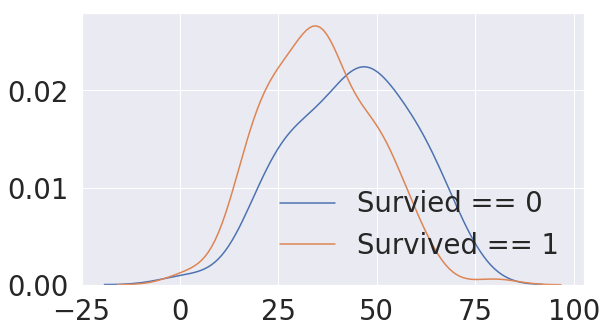

In [60]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
plt.legend(['Survied == 0', 'Survived == 1'])
plt.show()


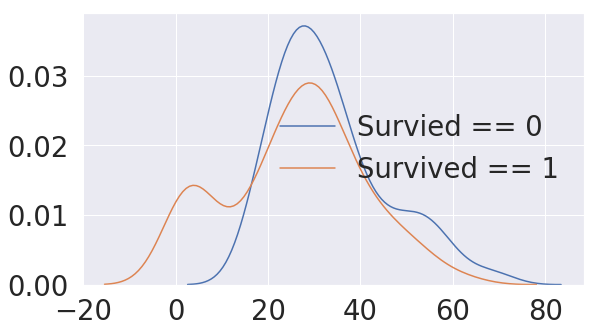

In [61]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
plt.legend(['Survied == 0', 'Survived == 1'])
plt.show()


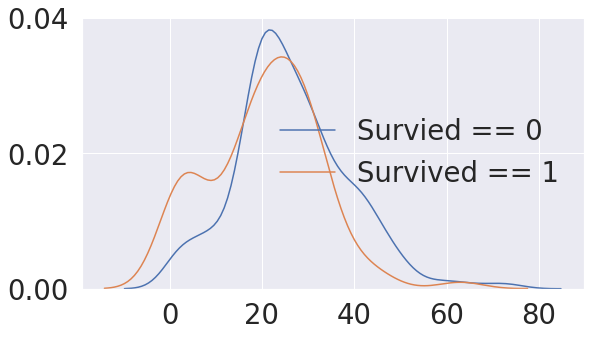

In [62]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
plt.legend(['Survied == 0', 'Survived == 1'])
plt.show()


- 1~80 살 까지 (i) 생존확률의 변화

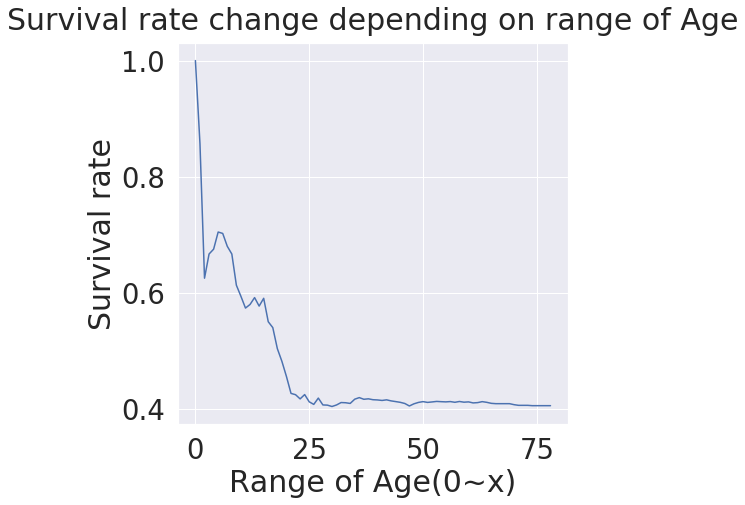

In [63]:
change_age_range_survival_ratio = []

for i in range(1,80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    

plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

## Pclass, Sex, Age
---



In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data=df_train, scale="count",split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110, 10))

sns.violinplot('Sex','Age',hue='Survived',data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()